In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [17]:
# Sample data (replace this with your actual data)
data = {
    'Model': ['BERT', 'RoBERTa', 'USE'],
    'Accuracy': [0.85, 0.88, 0.82],
    'F1_Score': [0.86, 0.87, 0.81],
    'Execution_Time': [20, 25, 15],
}



In [18]:
# Create a DataFrame
df = pd.DataFrame(data)



In [19]:
# Define weights for criteria (you can adjust these based on importance)
weights = {'Accuracy': 0.4, 'F1_Score': 0.4, 'Execution_Time': 0.2}


In [20]:

# Normalize the criteria
scaler = MinMaxScaler()
normalized_criteria = pd.DataFrame(scaler.fit_transform(df[['Accuracy', 'F1_Score', 'Execution_Time']]), columns=['Accuracy', 'F1_Score', 'Execution_Time'])



In [21]:
# Calculate the weighted normalized decision matrix
weighted_normalized_matrix = normalized_criteria.copy()
for criterion in weights:
    weighted_normalized_matrix[criterion] *= weights[criterion]



In [22]:
# Determine ideal and negative-ideal solutions
ideal_solution = weighted_normalized_matrix.max()
negative_ideal_solution = weighted_normalized_matrix.min()



In [23]:
# Calculate Euclidean distances to ideal and negative-ideal solutions
distance_to_ideal = np.linalg.norm(weighted_normalized_matrix - ideal_solution, axis=1)
distance_to_negative_ideal = np.linalg.norm(weighted_normalized_matrix - negative_ideal_solution, axis=1)




In [24]:
# Calculate TOPSIS score
topsis_score = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)



In [25]:
# Add TOPSIS score to the DataFrame
df['TOPSIS_Score'] = topsis_score



In [26]:
# Rank models based on TOPSIS score
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)



In [27]:
# Display the results table
print("Results Table:")
print(df)



Results Table:
     Model  Accuracy  F1_Score  Execution_Time  TOPSIS_Score  Rank
0     BERT      0.85      0.86              20      0.632384   2.0
1  RoBERTa      0.88      0.87              25      1.000000   1.0
2      USE      0.82      0.81              15      0.000000   3.0


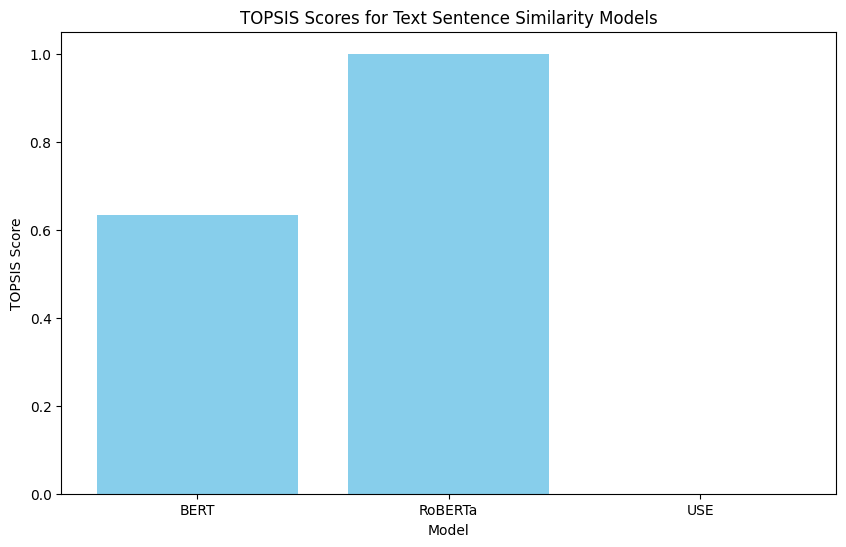

In [28]:
# Plotting bar chart for TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['TOPSIS_Score'], color='skyblue')
plt.title('TOPSIS Scores for Text Sentence Similarity Models')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.show()

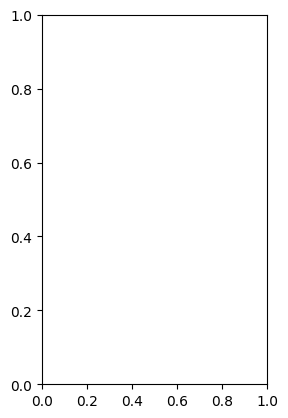

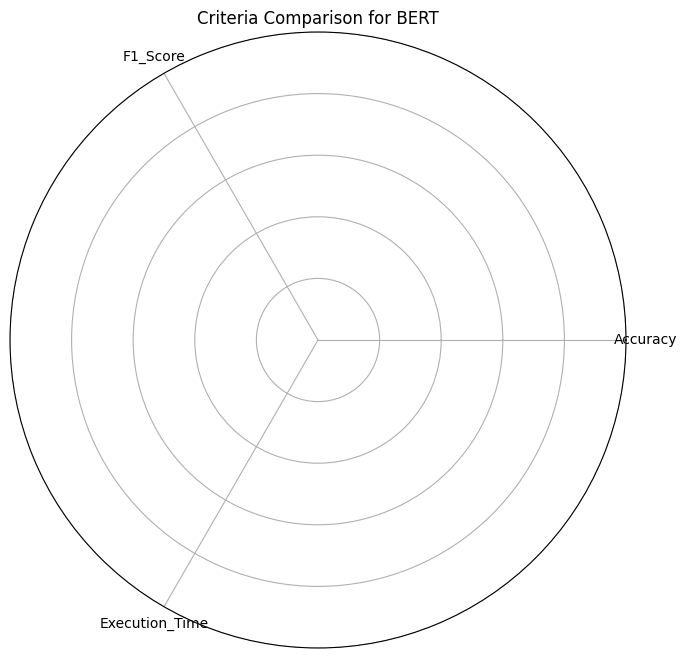

In [30]:
plt.subplot(1, 2, 2)
categories = list(normalized_criteria.columns)
values = normalized_criteria.iloc[0].tolist()
values += values[:1]  # To close the circular graph
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
#ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.set_yticklabels([])
ax.set_thetagrids(angles * 180 / np.pi, categories)
ax.set_title('Criteria Comparison for BERT')
plt.show()